# Metrics and Plots for the trained models

This notebook aims to viz results from metrics that were already saved in `results/scores_tables`

> [!NOTE]  
> normalization only applied to create protein embeddings

This notebook shows only protein embeddings performance along with gene expreession, as they are super competitive

## Viz

In [31]:
version='v2.11'
norm='minmax'

In [32]:
import pandas as pd
import sys,os
sys.path.append(os.path.abspath('../../../src/ml'))


from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer



In [33]:
avg_df=pd.read_csv('../../../results/score_tables/scores_avg_seeds.csv')
all_df=pd.read_csv('../../../results/score_tables/scores_all_seeds.csv')

In [34]:
input_data=[
 'gene_expression',

 'Complex_protein_embeddings',
 'RGCN_protein_embeddings',
 'weighted_RGCN_protein_embeddings',
 'GraphSAGE_protein_embeddings',
 'GAT_protein_embeddings',
#  'concatenated_protein_embeddings',

#  'Complex_sample_embeddings',
#  'RGCN_sample_embeddings',
#  'weighted_RGCN_sample_embeddings',
#  'GraphSAGE_sample_embeddings',
#  'GAT_sample_embeddings'
#  'concatenated_sample_embeddings'
]

In [35]:
df=avg_df
filtered_results=df[
        (df['input']=='gene_expression') 
        | ((df['version']==version) & (df['normalization']==norm))
        | (
            (norm != 'none')
            & df['input'].isin([
                'RGCN_sample_embeddings',
                'Complex_sample_embeddings',
                'concatenated_sample_embeddings'
            ])
            & (df['version']==version)
        )
]


For better foucsed results, consider only non pytorch mlp models and CompEx and RGCN only (the others gnns are not done yet)

So run this if metrics files contatin them

In [36]:
filtered_results=filtered_results[filtered_results['model']!='pytorch_mlp']
# -- only input in input_data
filtered_results=filtered_results[filtered_results['input'].isin(input_data)]
# filtered_results=filtered_results.iloc[:, :8]


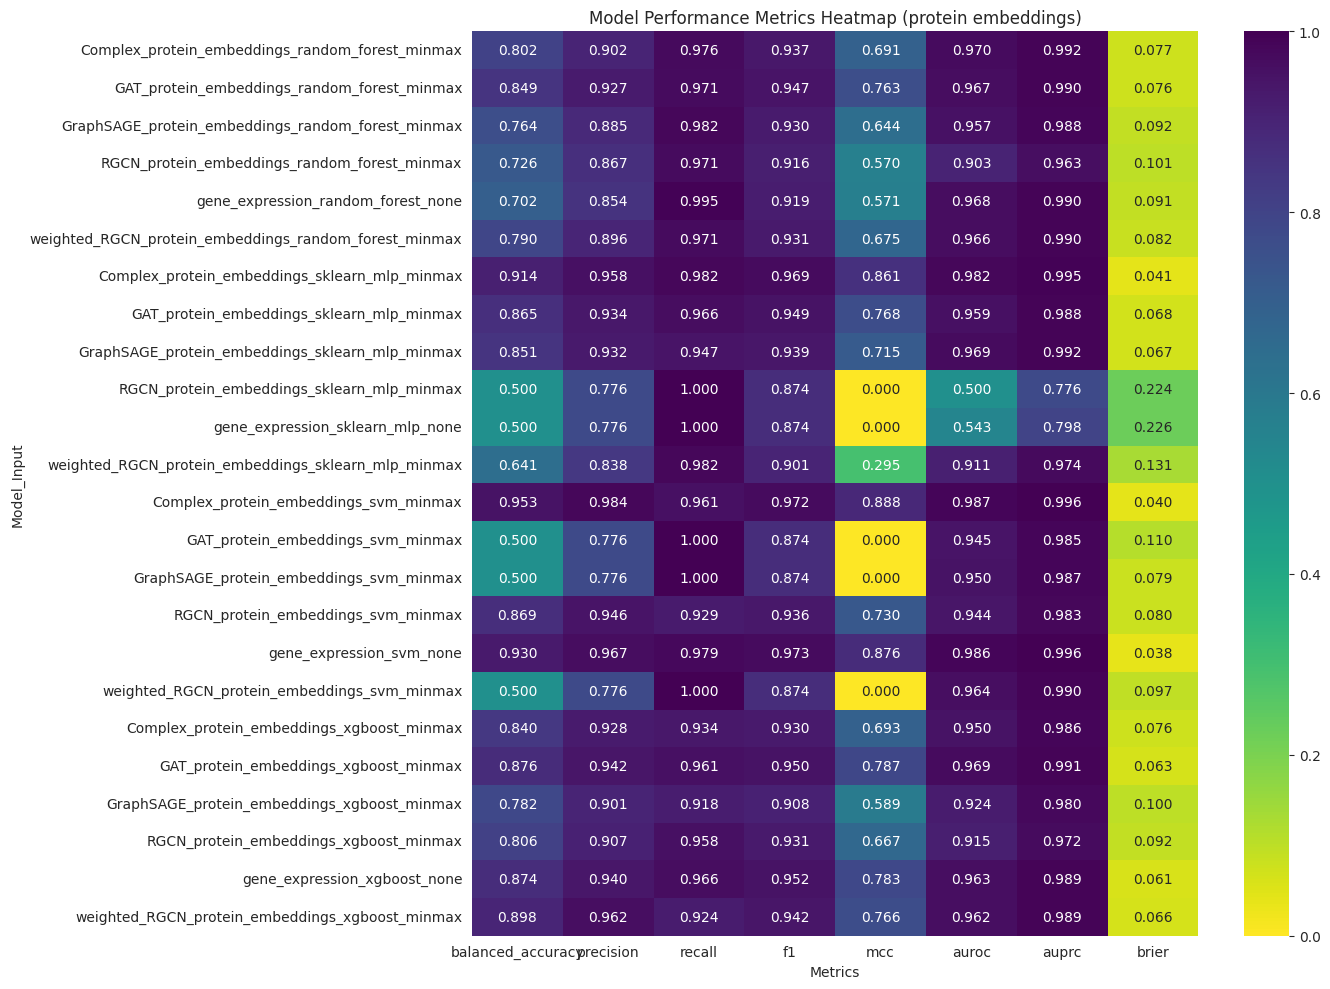

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc','auprc','brier']
filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
heatmap_data = filtered_results[filtered_results['input'].str.contains('protein') | (filtered_results['input']=='gene_expression')].set_index('model_input')[metrics]

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("Model Performance Metrics Heatmap (protein embeddings)")
plt.ylabel("Model_Input")
plt.xlabel("Metrics")

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


### 2. heatmap

model_dataset x score matrix 

In [38]:


SECONDARY_COLORS = {
    1: "#C60B46",  # pms-1945
    2: "#ED145B",  # pms-206
    3: "#EE3524",  # pms-1795
    4: "#F37320",  # pms-1665
    5: "#7C2A90",  # pms-2602
    6: "#7D6AAF",  # pms-2725
    7: "#C6671D", # pms-153
    8: "#FEBC18", # pms-123
    9: "#004E7D",  # pms-295
    10: "#0E87C9", # pms-2935
    11: "#0094B5", # pms-314
    12: "#46C3D2", # pms-3115
    13: "#00807A",  # pms-3292
    14: "#40B769", # pms-355
    15: "#8CC63E", # pms-376
    16: "#D5DF3D" # pms-381
}
vibrant_colors = [
    SECONDARY_COLORS[2],
    SECONDARY_COLORS[4],
    SECONDARY_COLORS[6],
    SECONDARY_COLORS[8],
    SECONDARY_COLORS[11],
    SECONDARY_COLORS[14]
]
dataset_colors={
    'gene_expression': SECONDARY_COLORS[2],# -- redish
    'Complex_protein_embeddings': SECONDARY_COLORS[11],
    'GAT_protein_embeddings': SECONDARY_COLORS[4],
    'GraphSAGE_protein_embeddings': SECONDARY_COLORS[14],
    'RGCN_protein_embeddings': SECONDARY_COLORS[6],
    'weighted_RGCN_protein_embeddings': SECONDARY_COLORS[8],
}

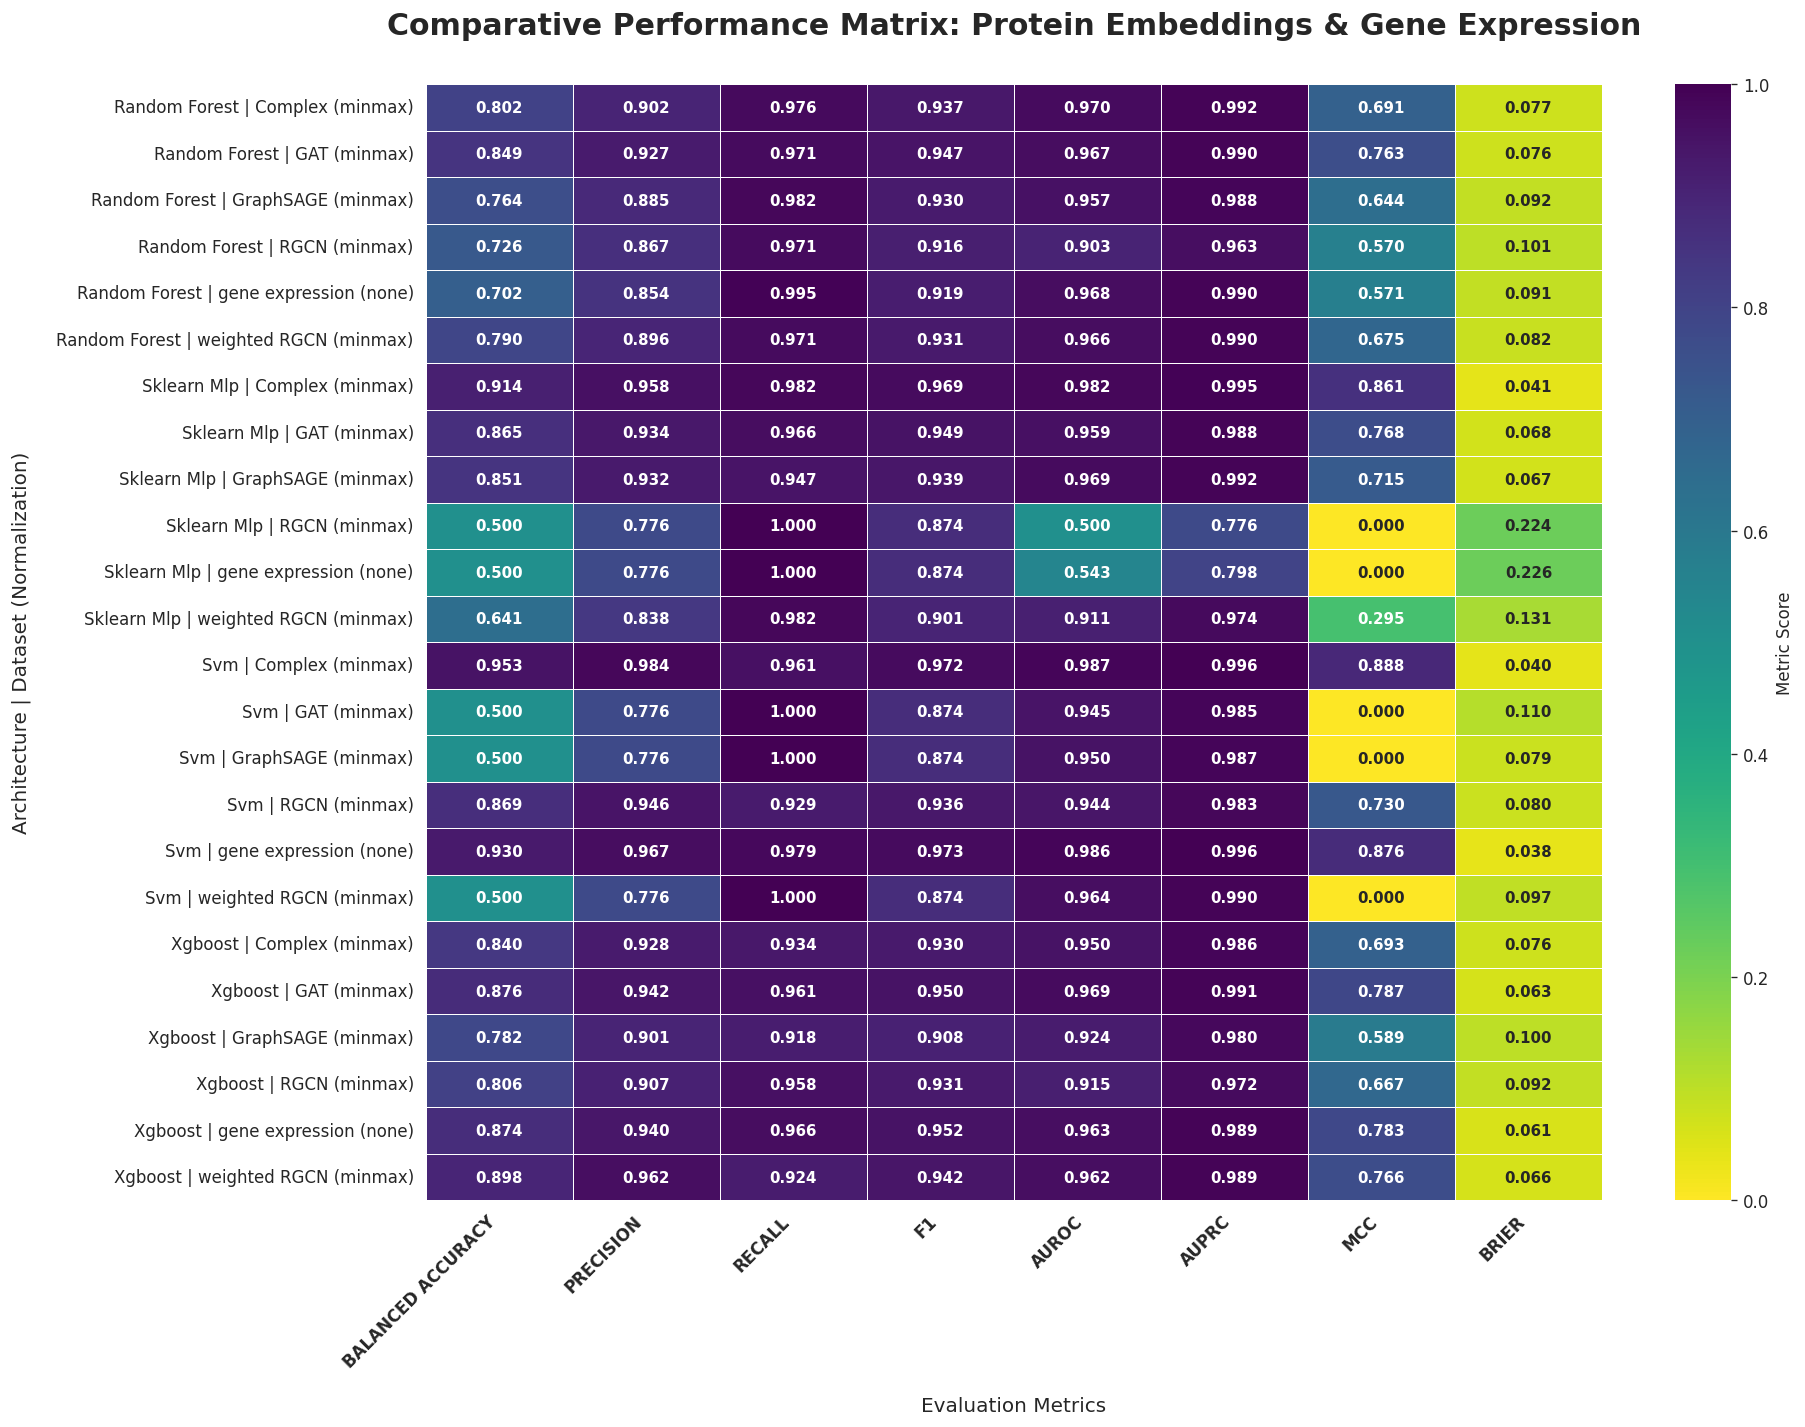

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. Custom Color Palette (Inspired by your PMS-2935 Blue / PMS-206 Red)
# We create a gradient from a light neutral to your deep professional blue
main_color =  '#004e7d'# (Professional Blue)
#mid blue color
mid_color = '#46C3D2'
cmap = LinearSegmentedColormap.from_list("custom_pms", ["#F8F9F9",mid_color, main_color])

# 2. Data Preparation & Label Cleaning
metrics = ['balanced_accuracy', 'precision', 'recall', 'f1','auroc','auprc','mcc','brier']

# Creating a cleaner Index for the heatmap
# We'll format it as "Model | Dataset (Norm)" for a professional look
filtered_results['display_label'] = (
    filtered_results['model'].str.replace('_', ' ').str.title() + " | " + 
    filtered_results['input'].str.replace('_protein_embeddings', '').str.replace('_', ' ') + 
    " (" + filtered_results['normalization'] + ")"
)

# Filtering logic
mask = filtered_results['input'].str.contains('protein') | (filtered_results['input'] == 'gene_expression')
heatmap_data = filtered_results[mask].set_index('display_label')[metrics]

# 3. Plotting
plt.figure(figsize=(16, 12), dpi=120)

sns.set_style("white")
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='viridis_r', 
    fmt=".3f",
    linewidths=.5,
    cbar_kws={'label': 'Metric Score'},
    annot_kws={"size": 9, "weight": "bold"}
)

# 4. Professional Styling
plt.title("Comparative Performance Matrix: Protein Embeddings & Gene Expression", 
          fontsize=18, weight='bold', pad=30)
plt.ylabel("Architecture | Dataset (Normalization)", fontsize=12, labelpad=15)
plt.xlabel("Evaluation Metrics", fontsize=12, labelpad=15)

# Formatting Metric Labels (X-axis)
metric_labels = [m.replace('_', ' ').upper() for m in metrics]
ax.set_xticklabels(metric_labels, rotation=45, ha='right', fontsize=10, weight='bold')

# Ensure the Y-labels are easy to read
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

# -- save this in ../../../results/figures/metrics/protein_heatmap.png
plt.savefig('../../../results/figures/metrics/protein_heatmap.png', dpi=120, bbox_inches='tight')

plt.show()

In [48]:
# # Define your chosen brand colors
# brand_gradient = ["#F8F9F9", "#46C3D2", "#0E87C9"]
# brand_cmap = LinearSegmentedColormap.from_list("brand_blue", brand_gradient)

# plt.figure(figsize=(14, 10))
# sns.heatmap(heatmap_data, 
#             annot=True, 
#             cmap='brand_cmap', # Apply the new brand cmap
#             fmt=".3f", 
#             linewidths=.5,
#             cbar_kws={'label': 'Performance Score'})